In [1]:
import pandas as pd

# Creating a dictionary with the data
dictionary = {"age": [22, 25, 30, 38, 42, 47, 55, 62, 61, 90], 
              "gender": ["M", "M", "F", "F", "F", "M", "M", "M", "M", "M"], 
              "civil_status": ["SINGLE", "SINGLE", "SINGLE", "MARRIED", "MARRIED", "SINGLE", "MARRIED", "DIVORCED", "MARRIED", "DIVORCED"], 
              "salary": [18000, 23000, 27000, 32000, 34000, 20000, 40000, 42000, 25000, 70000], 
              "has_children": [False, False, False, True, True, False, False, False, False, True], 
              "purchaser_type": ["LOW_PURCHASER", "LOW_PURCHASER", "LOW_PURCHASER", "HEAVY_PURCHASER", "HEAVY_PURCHASER", "LOW_PURCHASER", "MEDIUM_PURCHASER", "MEDIUM_PURCHASER", "MEDIUM_PURCHASER", "LOW_PURCHASER"]}

# Creating a Pandas DataFrame from the dictionary
dataframe = pd.DataFrame.from_dict(dictionary)

In [2]:
dataframe

,age,gender,civil_status,salary,has_children,purchaser_type
0,22,M,SINGLE,18000,False,LOW_PURCHASER
1,25,M,SINGLE,23000,False,LOW_PURCHASER
2,30,F,SINGLE,27000,False,LOW_PURCHASER
3,38,F,MARRIED,32000,True,HEAVY_PURCHASER
4,42,F,MARRIED,34000,True,HEAVY_PURCHASER
5,47,M,SINGLE,20000,False,LOW_PURCHASER
6,55,M,MARRIED,40000,False,MEDIUM_PURCHASER
7,62,M,DIVORCED,42000,False,MEDIUM_PURCHASER
8,61,M,MARRIED,25000,False,MEDIUM_PURCHASER
9,90,M,DIVORCED,70000,True,LOW_PURCHASER


In [7]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             10 non-null     int64 
 1   gender          10 non-null     object
 2   civil_status    10 non-null     object
 3   salary          10 non-null     int64 
 4   has_children    10 non-null     bool  
 5   purchaser_type  10 non-null     object
dtypes: bool(1), int64(2), object(3)
memory usage: 538.0+ bytes


In [8]:
df_knn = dataframe.copy()
df_gower = dataframe.copy()

#### KNN

In [10]:
#Get list of categorical variables
cat_var=(df_knn.dtypes == 'object')
object_cols = list(cat_var[cat_var].index)

print("Categorical variables in the dataset:", object_cols)

Categorical variables in the dataset: ['gender', 'civil_status', 'purchaser_type']


In [11]:
df1 = pd.get_dummies(df_knn, columns=object_cols, drop_first=True)
df1.columns

Index(['age', 'salary', 'has_children', 'gender_M', 'civil_status_MARRIED',
       'civil_status_SINGLE', 'purchaser_type_LOW_PURCHASER',
       'purchaser_type_MEDIUM_PURCHASER'],
      dtype='object')

In [13]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df1['has_children'] = df1[['has_children']].apply(le.fit_transform)

In [14]:
skew_columns = (df1
                .skew()
                .sort_values(ascending=False))

skew_columns = skew_columns.loc[skew_columns > 0.75]
skew_columns

salary                             1.712876
purchaser_type_MEDIUM_PURCHASER    1.035098
has_children                       1.035098
age                                0.817020
dtype: float64

In [16]:
import numpy as np
# Perform log transform on skewed columns
for col in skew_columns.index.tolist():
    df1[col] = np.log1p(df1[col])

In [17]:
skew_columns_trans = (df1
                .skew()
                .sort_values(ascending=False))

skew_columns_trans = skew_columns_trans.loc[skew_columns_trans > 0.75]
skew_columns_trans

purchaser_type_MEDIUM_PURCHASER    1.035156
has_children                       1.035098
salary                             0.761311
dtype: float64

In [18]:
df1.head()

,age,salary,has_children,gender_M,civil_status_MARRIED,civil_status_SINGLE,purchaser_type_LOW_PURCHASER,purchaser_type_MEDIUM_PURCHASER
0,3.135494,9.798183,0.000000,1,0,1,1,0.0
1,3.258097,10.043293,0.000000,1,0,1,1,0.0
2,3.433987,10.203629,0.000000,0,0,1,1,0.0
3,3.663562,10.373522,0.693147,0,1,0,0,0.0
4,3.761200,10.434145,0.693147,0,1,0,0,0.0


In [20]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(df1)
scaled_df = pd.DataFrame(scaler.transform(df1),columns= df1.columns )
scaled_df.head(4)

,age,salary,has_children,gender_M,civil_status_MARRIED,civil_status_SINGLE,purchaser_type_LOW_PURCHASER,purchaser_type_MEDIUM_PURCHASER
0,-1.606664,-1.382108,-0.654654,0.654654,-0.816497,1.224745,1.0,-0.654654
1,-1.307077,-0.742864,-0.654654,0.654654,-0.816497,1.224745,1.0,-0.654654
2,-0.877277,-0.324710,-0.654654,-1.527525,-0.816497,1.224745,1.0,-0.654654
3,-0.316296,0.118369,1.527525,-1.527525,1.224745,-0.816497,-1.0,-0.654654


C:\Users\Equipo\anaconda3\lib\site-packages\yellowbrick\utils\kneed.py:155: YellowbrickWarning: No 'knee' or 'elbow point' detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
C:\Users\Equipo\anaconda3\lib\site-packages\yellowbrick\cluster\elbow.py:343: YellowbrickWarning: No 'knee' or 'elbow' point detected, pass `locate_elbow=False` to remove the warning
  warnings.warn(warning_message, YellowbrickWarning)


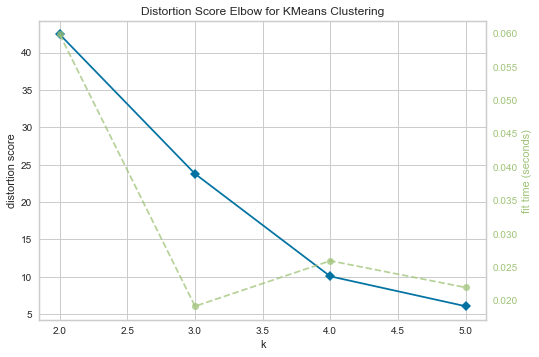

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [23]:
# Quick examination of elbow method to find numbers of clusters to make.
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
Elbow_M = KElbowVisualizer(KMeans(), k=5)
Elbow_M.fit(scaled_df)
Elbow_M.show()

In [25]:
num_clusters = 4
km = KMeans(n_clusters=num_clusters)
df_knn['Clusters_KM'] = km.fit_predict(scaled_df)

In [26]:
df_knn

,age,gender,civil_status,salary,has_children,purchaser_type,Clusters_KM
0,22,M,SINGLE,18000,False,LOW_PURCHASER,0
1,25,M,SINGLE,23000,False,LOW_PURCHASER,0
2,30,F,SINGLE,27000,False,LOW_PURCHASER,0
3,38,F,MARRIED,32000,True,HEAVY_PURCHASER,1
4,42,F,MARRIED,34000,True,HEAVY_PURCHASER,1
5,47,M,SINGLE,20000,False,LOW_PURCHASER,0
6,55,M,MARRIED,40000,False,MEDIUM_PURCHASER,2
7,62,M,DIVORCED,42000,False,MEDIUM_PURCHASER,2
8,61,M,MARRIED,25000,False,MEDIUM_PURCHASER,2
9,90,M,DIVORCED,70000,True,LOW_PURCHASER,3


#### GOWER

In [29]:
import gower
#We're seing dissimilaritys between customers... so, a number close to 1 indicates the customers are not alike, the opposite when it's close to 0
distance_matrix = gower.gower_matrix(df_gower)

In [36]:
names = ['Cust1','Cust2','Cust3','Cust4','Cust5','Cust6','Cust7','Cust8','Cust9','Cust10']
df_g = pd.DataFrame(distance_matrix.round(3), columns = names, index = names)
df_g

,Cust1,Cust2,Cust3,Cust4,Cust5,Cust6,Cust7,Cust8,Cust9,Cust10
Cust1,0.000,0.023,0.215,0.751,0.767,0.068,0.485,0.508,0.451,0.667
Cust2,0.023,0.000,0.192,0.727,0.744,0.064,0.461,0.485,0.428,0.643
Cust3,0.215,0.192,0.000,0.536,0.552,0.231,0.603,0.627,0.582,0.785
Cust4,0.751,0.727,0.536,0.000,0.016,0.727,0.567,0.758,0.579,0.749
Cust5,0.767,0.744,0.552,0.016,0.000,0.724,0.551,0.741,0.575,0.733
Cust6,0.068,0.064,0.231,0.727,0.724,0.000,0.417,0.441,0.384,0.599
Cust7,0.485,0.461,0.603,0.567,0.551,0.417,0.000,0.190,0.063,0.682
Cust8,0.508,0.485,0.627,0.758,0.741,0.441,0.190,0.000,0.224,0.492
Cust9,0.451,0.428,0.582,0.579,0.575,0.384,0.063,0.224,0.000,0.715
Cust10,0.667,0.643,0.785,0.749,0.733,0.599,0.682,0.492,0.715,0.000


In the first column, we see the dissimilarity of the first customer with all the others. This customer is similar to the second, third and sixth customer, due to the low GD.

We must remember the limitations that the Gower distance has due to the fact that it is neither Euclidean nor metric. Here we have the code where we define the clustering algorithm and configure it so that the metric to be used is “precomputed”

In [39]:
from sklearn.cluster import DBSCAN

# Configuring the parameters of the clustering algorithm
dbscan_cluster = DBSCAN (eps=0.3, 
                        min_samples=2, 
                        metric="precomputed")

# Fitting the clustering algorithm
dbscan_cluster.fit(distance_matrix)

# Adding the results to a new column in the dataframe
df_gower["cluster"] = dbscan_cluster.labels_
df_gower

,age,gender,civil_status,salary,has_children,purchaser_type,cluster
0,22,M,SINGLE,18000,False,LOW_PURCHASER,0
1,25,M,SINGLE,23000,False,LOW_PURCHASER,0
2,30,F,SINGLE,27000,False,LOW_PURCHASER,0
3,38,F,MARRIED,32000,True,HEAVY_PURCHASER,1
4,42,F,MARRIED,34000,True,HEAVY_PURCHASER,1
5,47,M,SINGLE,20000,False,LOW_PURCHASER,0
6,55,M,MARRIED,40000,False,MEDIUM_PURCHASER,2
7,62,M,DIVORCED,42000,False,MEDIUM_PURCHASER,2
8,61,M,MARRIED,25000,False,MEDIUM_PURCHASER,2
9,90,M,DIVORCED,70000,True,LOW_PURCHASER,-1
